In [ ]:
 #  KMeans MKL memory leak warning 
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [27]:
#  Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score



# Load Dataset
df = pd.read_csv("D:\data science\Assignments\Basic stats - 2\wine.csv")   # ← Change file name
df.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
# Basic Data Exploration
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

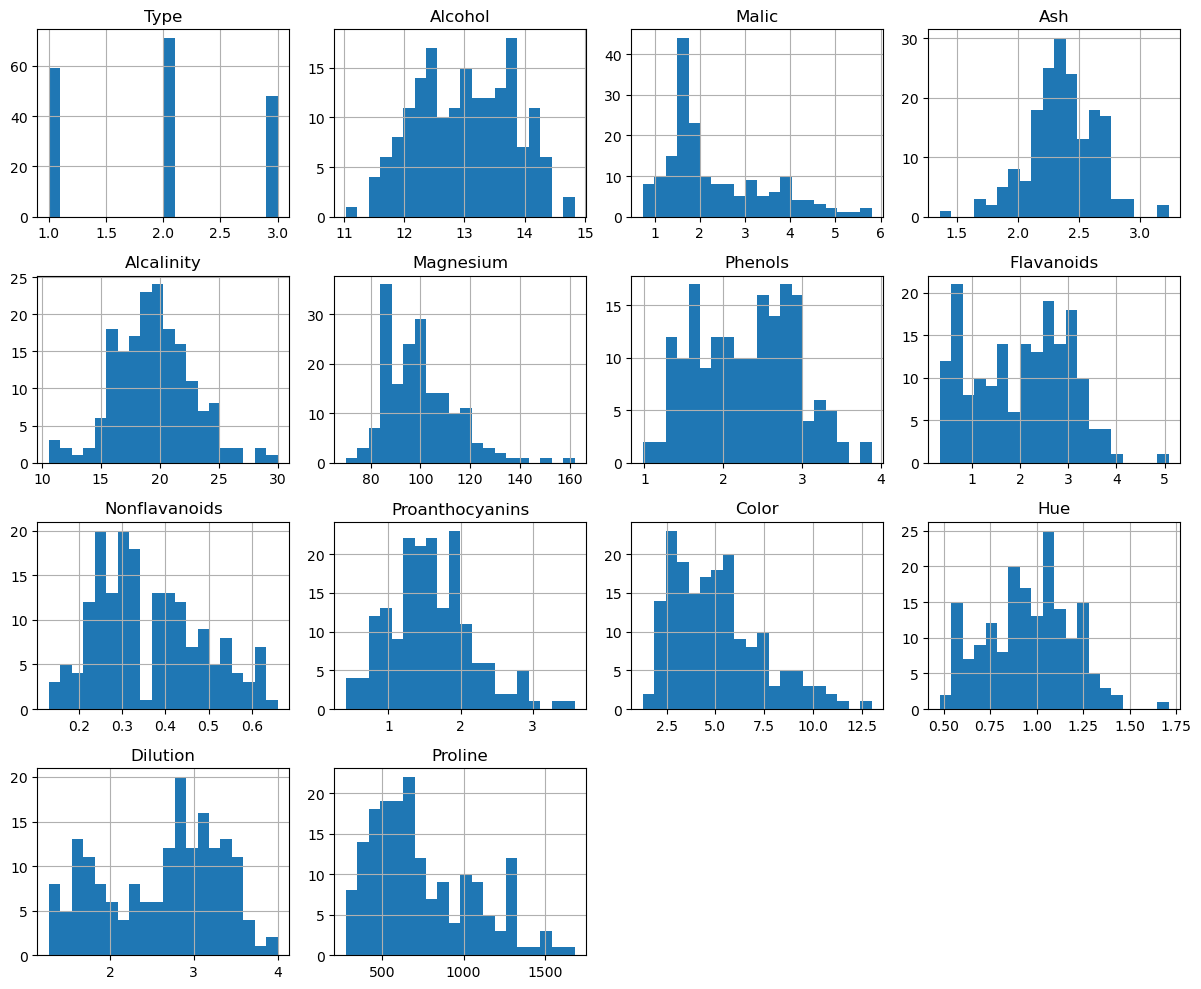

In [14]:
# Distribution of features (histograms)
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()


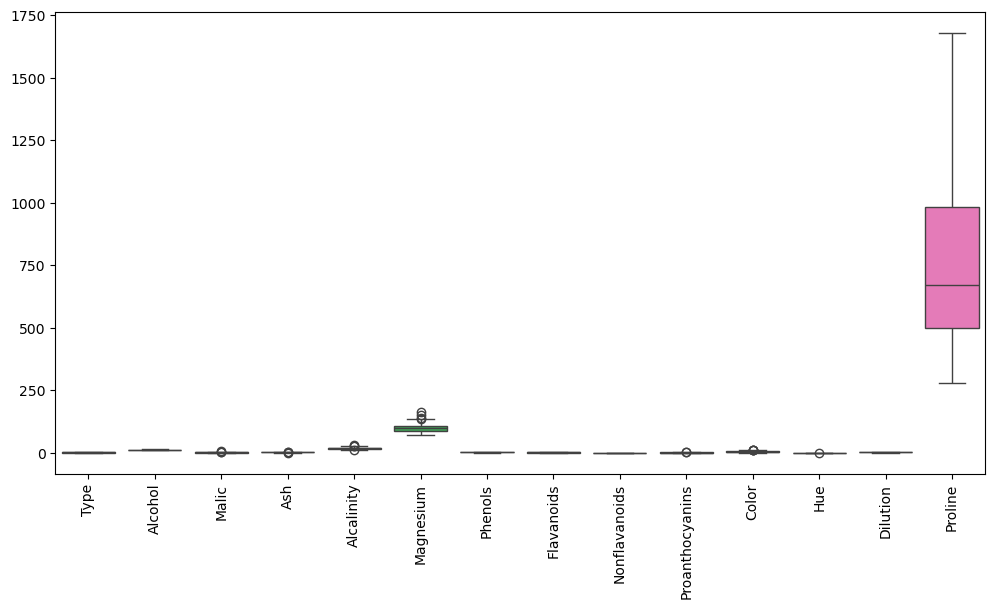

In [29]:
# Box plots
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


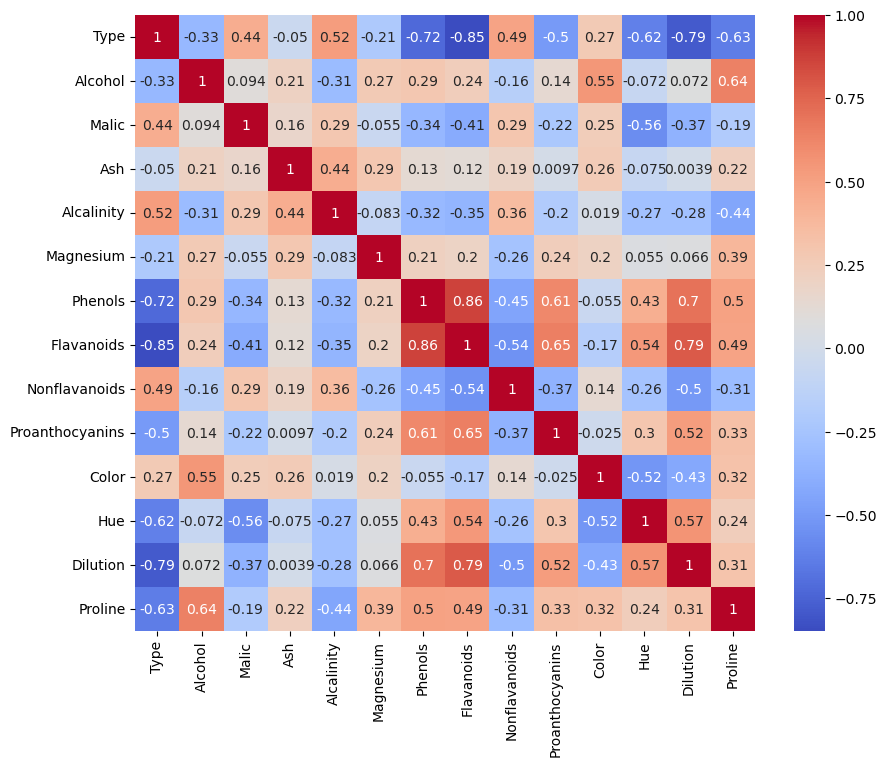

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [30]:
# Dimensity Reduction

# Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
# PCA Implementation
pca = PCA()
pca_fit = pca.fit(X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_
explained_var


array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

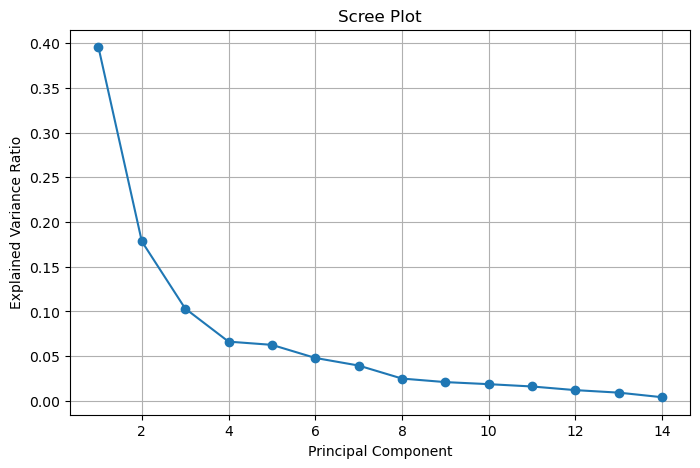

In [32]:
# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


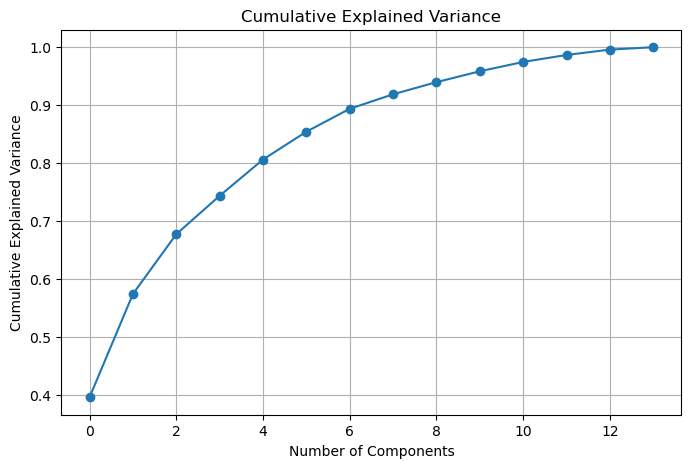

In [33]:
# Cumulative Explained Variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_var), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [21]:
# Choose optimal components (example: 2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_pca[:5]


array([[-3.5229339 ,  1.45309844],
       [-2.52885806, -0.33001925],
       [-2.78502898,  1.03693595],
       [-3.92258841,  2.76821026],
       [-1.40751111,  0.86777309]])

In [23]:
# Clustering on Original Data



from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-Means on original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(X_scaled)


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


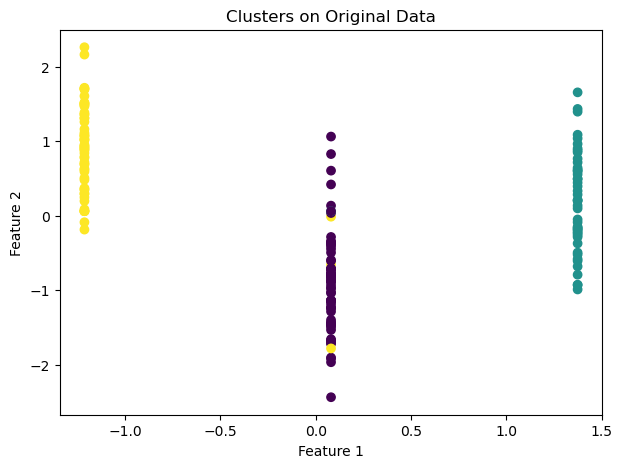

In [34]:
# Clustering Visualization (first two features)
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_original)
plt.title("Clusters on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [35]:
# Performance Metrics
sil_original = silhouette_score(X_scaled, labels_original)
db_original = davies_bouldin_score(X_scaled, labels_original)

sil_original, db_original


(np.float64(0.30648398324833453), np.float64(1.315707552261773))

In [36]:
# Clustering on PCA Data
# K-Means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


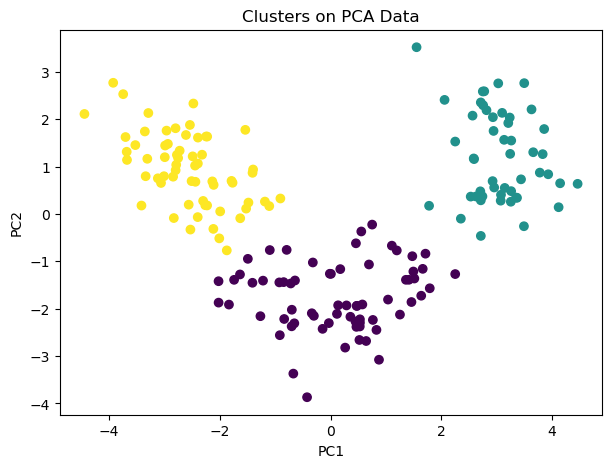

In [37]:
# PCA Clustering Visualization
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_pca)
plt.title("Clusters on PCA Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [38]:
# Performance Metrics
sil_pca = silhouette_score(X_pca, labels_pca)
db_pca = davies_bouldin_score(X_pca, labels_pca)

sil_pca, db_pca


(np.float64(0.6024415520362845), np.float64(0.5397078562575711))

In [39]:
# Comparison & Analysis
print("Silhouette Score (Original Data):", sil_original)
print("Silhouette Score (PCA Data):", sil_pca)

print("Davies-Bouldin Index (Original Data):", db_original)
print("Davies-Bouldin Index (PCA Data):", db_pca)


Silhouette Score (Original Data): 0.30648398324833453
Silhouette Score (PCA Data): 0.6024415520362845
Davies-Bouldin Index (Original Data): 1.315707552261773
Davies-Bouldin Index (PCA Data): 0.5397078562575711


In [ ]:
# Conclusion & Insights
 # Sample Conclusion

 # PCA reduced dimensionality while preserving most variance.
  # Clustering performance improved / decreased (depends on your dataset results).
   # PCA made visual clusters easier to interpret.

# Use PCA when:
# Data is high-dimensional
# Features are correlated
# Visualization is required
 # Use original data when:

  #  Raw features carry important meaning

  #   You want maximum performance and interpretability